<a href="https://colab.research.google.com/github/thulieblack/LearningTensorFlow/blob/main/basic_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


In [26]:
data = keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels)=data.load_data()

In [27]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [28]:
train_images.shape

(60000, 28, 28)

In [29]:
test_images.shape

(10000, 28, 28)

In [30]:
train_images = train_images/255.0

In [31]:
test_images = test_images/255.0

In [32]:
#Model Creation

model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(128,activation='relu'),
                          keras.layers.Dense(10,activation='softmax')
])

In [33]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [34]:
model.fit(train_images,train_labels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6234 - accuracy: 0.7805
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3860 - accuracy: 0.8608
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3380 - accuracy: 0.8773
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3113 - accuracy: 0.8855
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2947 - accuracy: 0.8911
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2814 - accuracy: 0.8946
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2697 - accuracy: 0.9004
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2573 - accuracy: 0.9027
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2495 - accuracy: 0.9069
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.234

In [35]:
test_loss,test_acc = model.evaluate(test_images,test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.3406 - accuracy: 0.8821


In [36]:
print('Tested Acc:', test_acc)

Tested Acc: 0.882099986076355


In [37]:
#Model predictions

predictions = model.predict(test_images)


In [38]:
print(class_names[np.argmax(predictions[5])])

Trouser


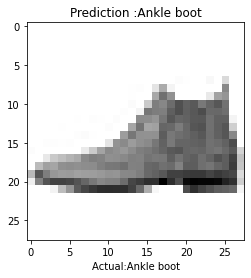

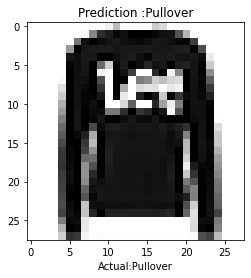

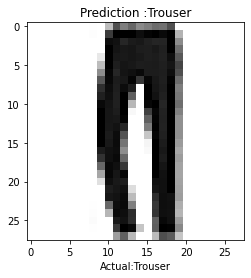

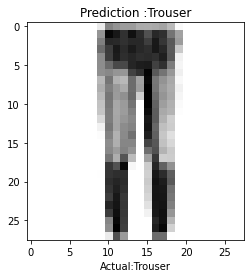

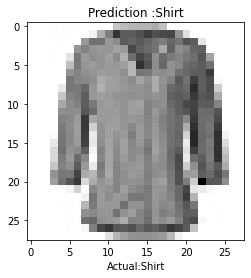

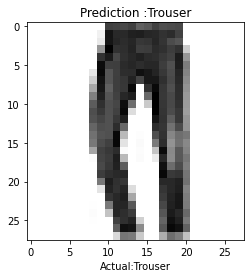

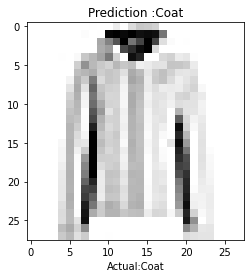

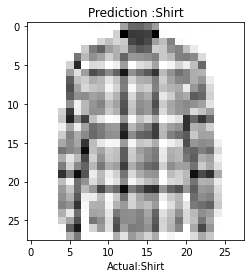

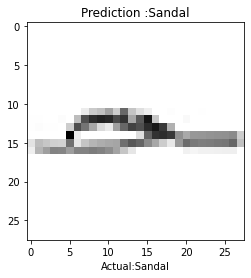

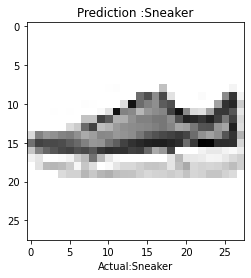

In [39]:
# create a for loop that loops through different test images and show the actual image vs predicted image

pred = model.predict(test_images)
for i in range(10):
  plt.grid(False)
  plt.imshow(test_images[i],cmap = plt.cm.binary)
  plt.xlabel('Actual:' + class_names[test_labels[i]])
  plt.title('Prediction :' + class_names[np.argmax(pred[i])])
  plt.show()